1) <span style="color:red"> Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. </span>

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 




CALIFICACIÓN:


In [38]:
4+2

6

COMENTARIOS:

1) Ej 2: Al final del archivo se aclara el motivo por el que tu cadena de markov consiste en el último punto alcanzado repetido $N$ veces. Este es un problema que ya apareció en clase (creo recordar).


## Ejercicio 1

Consideramos el siguiente 'juego': inicialmente hay $n$ jugadores  y en cada fase del juego cada jugador vivo elige **al azar** otro jugador vivo, distinto de sí mismo,  y lo mata.  El juego se repite hasta que queda un único jugador, *el elegido del destino*, o bien ninguno. En principio, es perfectamente posible que el juego se juegue una única vez.

1) Estima, con dos cifras decimales 'correctas',  la probabilidad de que, partiendo de  $n=100$ jugadores, haya un superviviente. Como se indicó en clase, entendemos que que son cifras decimales 'correctas' las que no cambian cuando se incrementa suficientemente el número $N$ de 'casos posibles'.

2) ¿Qué probabilidad tengo, si decido jugar con otros $99$ jugadores,  de ser yo el *elegido del destino*? Modifica el programa del apartado anterior para estimar la probabilidad y explica el resultado obtenido.

3) Ahora queremos estudiar la duración del juego. Para eso debemos  calcular *promedios* de la duración. Define una función *promedio(n,N)* que calcule el promedio y la desviación estándar de la duración con $n$ jugadores iniciales y $N$ repeticiones del juego. Evalúa *promedio(100,10^5)* y comenta los resultados obtenidos.

4) Finalmente, estudia la variación de los promedios al variar $n$ entre $10$ y $200$ saltando de $10$ en $10$. Realiza un gráfico de los resultados y analiza la dependencia funcional (el promedio como función de $n$). En este cuarto apartado probablemente tendrás que **elegir con más cuidado un $N$** (el número de repeticiones del juego utilizadas para calcular cada promedio) **adecuado**  dadas las capacidades bastante limitadas de la máquina. 

In [70]:
#Esta funcion comprobará si se cumplen las condiciones para que se termine el juego.
def terminaJuego(L):
    vivos = 0
    if(any(L)==0):
        return true
    
    for i in L:
        #Encontramos algún vivo
        if i==1:
            #Si ya habia algún vivo, el juego no termina
            if(vivos==1):
                return false
            #Si este era el primer vivo, marcamos su existencia
            vivos = 1
    #Si no se han encontrado dos vivos o más el juego termina 
    return true

In [73]:
#Funcion que simula una partida del juego. Devuelve -1 si no quedó ninguno vivo y
#la posición en la lista del superviviente si lo hubo en primer lugar, y el numero de
#rondas total de la partida en segundo lugar.
def juego(n):
    L = [1]*n;
    NRondas =0
    
    while(terminaJuego(L)==false):
        #Cada vez que se ejecuta este while equivale a una ronda del juego
        NRondas = NRondas + 1
        #Este array almacenará la eleccion de cada jugador de la lista
        eleccion = [0]*n;
        for i in srange(n):
            if L[i]==1:
                eleccion[i]=randint(0, n-1)
                #Si se ha elegido a si mismo o ha elegido a un jugador muerto debe elegir a otro
                while(eleccion[i]==i or L[eleccion[i]]==0)==true:
                    eleccion[i]=randint(0,n-1)
        #Ejecutamos las elecciones de cada jugador
        for elec in eleccion:
            L[elec]=0;
    
    #Busquemos ahora al elegido del destino, si lo hay
    for i in srange(n):
        if(L[i]==1):
            return i, NRondas
    #Si llegamos hasta aquí es que no ha sobrevivido nadie
    return -1, NRondas
            

Apartado 1:

In [74]:
#Esta funcion recibe el numero de personas con las que realizar el experimento (n) y el número
#de veces a repetirlo (rep), despues devuelve la probabilidad normalizada de que haya 
#un superviviente
def Prob1Sup(n, rep):
    veces = 0
    partida = 0
    NRondas = 0
    for int in xrange(rep):
        #Desechamos NRondas
        partida, NRondas = juego(n)
        if(partida!=(-1)):
            veces = veces + 1
    return veces/rep.n()


print Prob1Sup(100, 2000)
print Prob1Sup(100, 2500)
print Prob1Sup(100, 3000)

0.523500000000000
0.528800000000000
0.518333333333333


Como podemos observar, las dos primeras cifras decimales no cambian para los 3 valores de rep 
que hemos probado. Por tanto, podemos considerarlas como 'correctas'

Apartado 2:

In [55]:
#Esta funcion recibe el numero de personas con las que realizar el experimento (n) y el número
#de veces a repetirlo (rep), despues devuelve la probabilidad normalizada de que sea la persona 1
#el único superviviente
def Prob1Sup(n, rep):
    veces = 0
    partida = 0
    NRondas = 0
    for int in xrange(rep):
        #Desechamos NRondas
        partida, NRondas = juego(n)
        if(partida==1):
            veces = veces + 1
    return veces/rep.n()


print Prob1Sup(100, 10000)
print Prob1Sup(100, 10000)
print Prob1Sup(100, 10000)

0.00520000000000000
0.00540000000000000
0.00480000000000000


Vemos que la probabilidad es muchísimo mas baja y que además varía mucho más entre experimentos
repetidos. Esto se debe a que, como hemos concluido en el apartado 1, hay algo mas del 50% de 
probabilidad de que haya un superviviente, de ese 50%, la probabilidad de que ese superviviente
sea una persona concreta (en nuestro caso, la 1) es 100 veces menor (tantas como personas haya
jugando en ese momento) porque tienen que darse dos sucesos independientes: que haya un super-
viviente, y que sea el de la posición 1.

Apartado 3:

In [83]:
def promedio(n, N):
    partida = 0
    NRondas = 0
    totalRondas = 0
    L = []
    for i in srange(N):
        partida, NRondas = juego(n)
        L.append(NRondas)
        totalRondas = totalRondas + NRondas
    return totalRondas/N.n(), sage.stats.basic_stats.std(L).n()

promedio(100, 10**5)

(4.42498000000000, 0.514076494644935)

Apartado 4:

In [90]:
nPers = 10
L = []
media=0 
stat=0

while(nPers<=200):
    media, stat = promedio(nPers, 100)
    L.append(media)
    nPers = nPers + 10


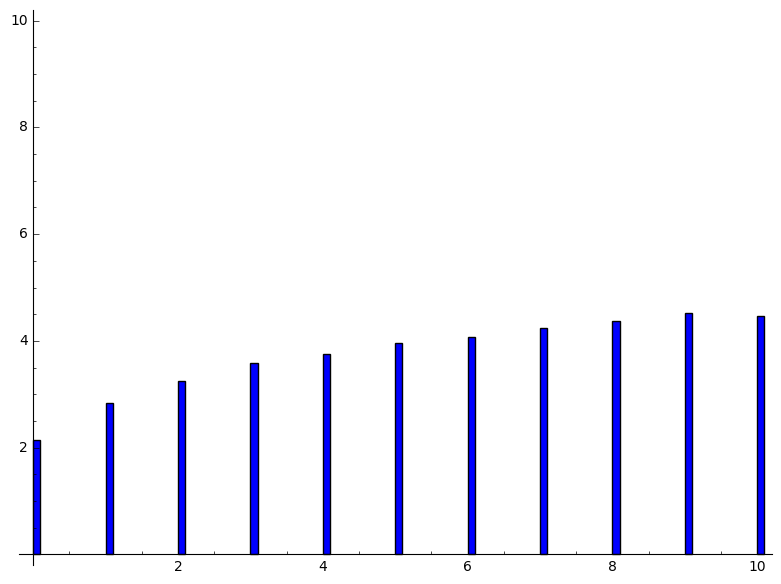

In [92]:
bar_chart(L,width=0.1).show(xmin=0,xmax=10,ymin=0,ymax=10)

## Ejercicio 2

Hemos visto que es posible estimar el área de un disco unidad *lanzando dardos al cuadrado unidad y contando los que caen dentro del disco*. El mismo procedimiento permite, en principio,  estimar el volumen de la hiperesfera $\mathbb{B}_n$  de radio $1$ en $\mathbb{R}^n$ (i.e. el conjunto de puntos de coordenadas $(x_1,x_2,\dots,x_n)\in \mathbb{R}^n$ tales que $x_1^2+x_2^2+\dots+x_n^2\le 1$), pero los volúmenes que vamos obteniendo al incrementar $n$ son cada vez más pequeños y bastante pronto obtenemos cero como respuesta. 

Ésto se debe a que, cuando $n$ es grande, muy pocos dardos caen dentro de la hiperesfera debido a que ocupa muy poco volumen con respecto al volumen, $2^n$,  del hipercubo unidad $[-1,1]^n$. En este ejercicio vemos una manera distinta de *lanzar dardos*, que nos va a asegurar que suficientes caen dentro de la hiperesfera. Denotemos por $V(n)$ el volumen de $\mathbb{B}_n$, que es lo que  queremos calcular. 

### Descripción del método

1) El *truco básico* consiste en considerar la hiperesfera de dimensión $n$  dentro del hipercilindro $\mathbb{C}_n:=\mathbb{B}_{n-1}\times [-1,1]$, en lugar de dentro del hipercubo $[-1,1]^n$.  El volumen del hipercilindro es, gracias al teorema de Fubini del cálculo integral, igual al volumen de $\mathbb{B}_{n-1}$ multiplicado por dos. 

2) En segundo lugar  observamos que para  obtener puntos aleatorios en el hipercilindro $\mathbb{C}_n$ basta generar puntos aleatorios $(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$ en la hiperesfera de dimensión $n-1$ y para cada uno producir un real aleatorio $x_n$ en el intervalo $[-1,1]$. 

3) Para que esto funcione debemos encontrar una **manera eficiente** de generar puntos aleatorios en la hiperesfera $\mathbb{B}_{n-1}$,  y el método que vamos a usar se llama de  *cadena de Markov* (una especie de *paseo aleatorio generalizado*):

A) El primer punto de la cadena $\mathbf{x}_0$ es, por ejemplo,  el origen de coordenadas.
    
B) Para cada punto $\mathbf{x}_t=(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$  obtenemos un nuevo punto $\mathbf{x}_{t+1}$ eligiendo una coordenada al azar, supongamos que hemos obtenido $x_i$,  y un real aleatorio $\Delta$ en el  intervalo $[-\delta,\delta]$. Entonces, cambiamos $x_i$ por $x_i+\Delta$ en $\mathbf{x}$ y si todavía estamos dentro de la hiperesfera ese es el nuevo punto $\mathbf{x}_{t+1}$ en la cadena. Si al hacer el cambio nos vamos fuera de la hiperesfera dejamos $\mathbf{x}_{t+1}:=\mathbf{x}_{t}$. 

C) La cadena $\{\mathbf{x}_0,\mathbf{x}_1,\dots,\mathbf{x}_t,\dots,\mathbf{x}_N\}$ es entonces un conjunto de $N+1$ puntos, todos en la hiperesfera $\mathbb{B}_{n-1}$, y se puede demostrar que, para $N$ suficientemente grande,  están uniformemente distribuidos en la hiperesfera. 

4) Después de estos preparativos podemos ya plantear el cálculo del volumen  $V(n)$ de la hiperesfera $\mathbb{B}_n$: 

Generamos un número muy grande $N$ de puntos en la hiperesfera de dimensión $n-1$, usando el apartado 3),  y para cada uno de ellos vamos calculando un punto en el hipercilindro, como en el apartado 2). Si el punto obtenido en el hipercilindro cae dentro de la hiperesfera  de dimensión $n$, $\mathbb{B}_n$,  incrementamos un contador, al que por ejemplo hemos llamado *dentro*. 

La fracción $dentro/N$, calculada después de haber generado $N$ puntos del hipercilindro,   es aproximadamente igual al cociente de volúmenes $V(n)/(2V(n-1))$ (volumen de la hiperesfera dividido por volumen del hipercilindro). 

Entonces, podemos reducir el cálculo  de $V(n)$ al de $V(n-1)$, el de $V(n-1)$ al de $V(n-2)$, etc., hasta llegar al volumen de la hiperesfera en dimensión $1$ que es igual a dos. 

### Ejercicios

2.1) Define las funciones necesarias para implementar esta forma, *Monte Carlo con cadenas de Markov*,  de calcular $V(n).$

2.2) El volumen exacto de una hiperesfera se puede calcular mediante integrales, y se obtiene una fórmula que se indica en la celda siguiente:


In [97]:
def Vol_exacto(dim):
    return (pi**(dim/2.0)/gamma(dim/2.0+1.0)).n()

In [4]:
print Vol_exacto(1);print Vol_exacto(2); print Vol_exacto(3); print Vol_exacto(100)

2.00000000000000
3.14159265358979
4.18879020478639
2.36820210188283e-40


¿Para qué queremos estimar esos mismos volúmenes mediante Monte Carlo? Los resultados exactos sirven como control de las estimaciones, y,  en particular,  permiten ajustar de forma óptima los parámetros $N$ y $\delta$. 

El parámetro $N$ debe ser suficientemente grande para obtener una precisión aceptable, pero no tan grande que tengamos que esperar una eternidad por el resultado, y el parámetro $\delta$, un real que podemos esperar que esté entre cero y uno,  no puede ser muy pequeño,  porque entonces todos los puntos de la cadena están muy próximos entre sí y no rellenan bien la hiperesfera, ni muy grande porque entonces la cadena repite muchas veces sus valores. 

 Queremos elegir los parámetros, $N$ y $\delta$,  para calcular,  mediante Monte Carlo,  el volumen de la hiperesfera de dimensión $50$  de forma que al menos sea correcta la primera cifra decimal no nula (por supuesto, cuantas más cifras correctas obtengamos mejor). Tomamos $N=10^5$ y elegimos un $\delta$ óptimo, dentro del intervalo $(0,1)$,   mediante experimentos adecuados. 




Apartado 2.1)

In [11]:
#Esta funcion comprueba que el punto que recibe está dentro de la hiperesfera de su dimensión
def dentroHiperEsfera(p):
    suma = 0
    for i in p:
        suma = suma + i**2
    if suma>1:
        return false
    else:
        return true

#Esta función nos daría el siguiente punto en la cadena de Markov
def otroPunto(p, delta):
    #Elegimos una coordenada
    coord = randint(0, len(p)-1)
    #La siguiente instruccion calcula cuánto va a cambiar la coordenada
    cambio = (random()*2*delta)-delta
    p[coord] = p[coord]+cambio
    return p
    
#Esta funcion calcula un array de puntos con el método del enunciado
def markov(n, N, delta):
    punto = [0]*n
    puntos=[punto]
    for muda in srange(N):
        nuevoPunto = otroPunto(punto, delta)
        #Si el nuevo punto está dentro de la hiperesfera actualizamos punto,
        #si no, no lo actualizamos y metemos el punto anterior(como se indica 
        #el enunciado)
        if dentroHiperEsfera(nuevoPunto):
            punto = nuevoPunto
        puntos.append(punto)
    return puntos
    
    
    

In [2]:
#Donde n es el numero de dimensiones, N el numero de puntos a utilizar y sigma 
#la variacion que puede tener una coordenada al calcular el siguiente punto.

def VolHiperEsfera(n, N, delta):
    #Obtenemos puntos de la hiperesfera de n-1
    puntos = markov(n-1, N, delta);
    dentro = 0
    nuevaCoordenada = 0
    for punto in puntos:
        #Hallamos la suma de todas las coordenadas al cuadrado, y le sumamos la nueva coordenada
        sumaCoordenadas = 0
        for coord in punto:
            sumaCoordenadas = sumaCoordenadas + coord**2
        #Queremos que la nueva coordenada esté entre -1 y 1
        nuevaCoordenada = random()*2-1
        sumaCoordenadas = sumaCoordenadas + nuevaCoordenada**2
        
        #Si el punto formado por las coordenadas de 'punto' junto con la nuevaCoordenada
        #está dentro de la hiperesfera, sumaCoordenadas tiene que ser menor o igual que 1.
        if(sumaCoordenadas<=1):
            dentro = dentro + 1
    return dentro/N

Apartado 2.2)

In [149]:
VolHiperEsfera(50, 10**5, 0.4)

0


0

VolHiperEsfera devuelve 0, porque todos los puntos que obtiene quedan fuera de la hiperesfera,
sin embargo, no se por qué ocurre esto, la funcion markov funciona correctamente y es la que
se encarga de obtener esos puntos.

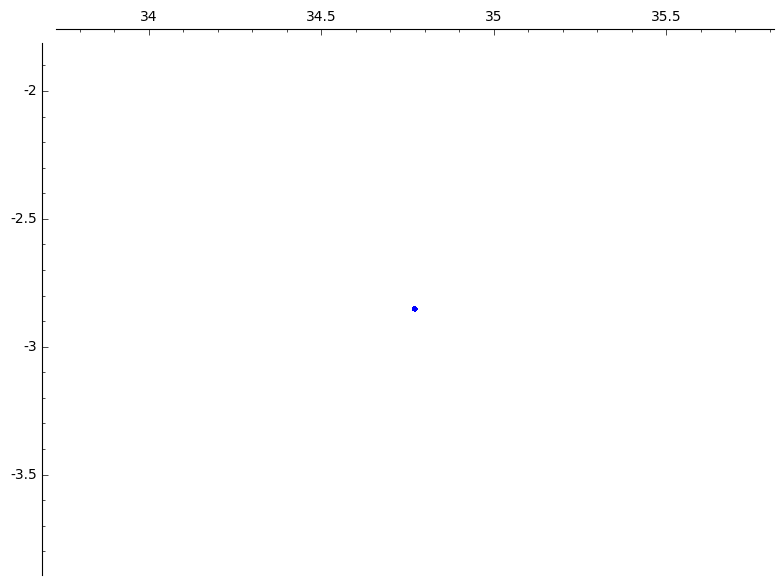

In [3]:
points(markov(2, 10**5,0.3))

In [ ]:
def markov(n, N, delta):
    punto = [0]*n
    puntos=[punto]
    for muda in srange(N):
        nuevoPunto = otroPunto(punto, delta)
        #Si el nuevo punto está dentro de la hiperesfera actualizamos punto,
        #si no, no lo actualizamos y metemos el punto anterior(como se indica 
        #el enunciado)
        if dentroHiperEsfera(nuevoPunto):
            punto = nuevoPunto
            print punto,nuevoPunto
        #print puntos
        puntos.append(punto)
    return puntos

In [12]:
markov(2,10,0.3)

[0, -0.286765783414702] [0, -0.286765783414702]
[0.299249028281867, -0.286765783414702] [0.299249028281867, -0.286765783414702]
[0.325503220036838, -0.286765783414702] [0.325503220036838, -0.286765783414702]
[0.325503220036838, -0.128497231531365] [0.325503220036838, -0.128497231531365]
[0.325503220036838, -0.281203624506752] [0.325503220036838, -0.281203624506752]
[0.0894529985721034, -0.281203624506752] [0.0894529985721034, -0.281203624506752]
[0.0894529985721034, -0.563905963464127] [0.0894529985721034, -0.563905963464127]
[0.0894529985721034, -0.401927936783445] [0.0894529985721034, -0.401927936783445]
[-0.0282240141948704, -0.401927936783445] [-0.0282240141948704, -0.401927936783445]
[0.183096648009328, -0.401927936783445] [0.183096648009328, -0.401927936783445]


[[0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445],
 [0.183096648009328, -0.401927936783445]]

## Discusión del error (rhg)

Cuando cambiamos $L$ en la línea L[0] += 1 cambian todas las apariciones de $L$ en el código.  Esto se puede evitar pasando a tuplas, que son inmutables, o copiando la lista antes y después de modificarla. 

In [13]:
def pruebita(n,N):
    L = [0]*n
    L1 = [L]
    for int in xsrange(N):
        L[0] += 1
        L1.append(L)
    return L1
    

In [14]:
pruebita(2,10)

[[10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0]]

In [19]:
def pruebita2(n,N):
    L = [0 for muda in srange(n)]
    L1 = [L]
    for int in xsrange(N):
        print L,L1
        L[0] += 1
        L1.append(L)
    return L1

In [20]:
pruebita2(2,10)

[0, 0] [[0, 0]]
[1, 0] [[1, 0], [1, 0]]
[2, 0] [[2, 0], [2, 0], [2, 0]]
[3, 0] [[3, 0], [3, 0], [3, 0], [3, 0]]
[4, 0] [[4, 0], [4, 0], [4, 0], [4, 0], [4, 0]]
[5, 0] [[5, 0], [5, 0], [5, 0], [5, 0], [5, 0], [5, 0]]
[6, 0] [[6, 0], [6, 0], [6, 0], [6, 0], [6, 0], [6, 0], [6, 0]]
[7, 0] [[7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0]]
[8, 0] [[8, 0], [8, 0], [8, 0], [8, 0], [8, 0], [8, 0], [8, 0], [8, 0], [8, 0]]
[9, 0] [[9, 0], [9, 0], [9, 0], [9, 0], [9, 0], [9, 0], [9, 0], [9, 0], [9, 0], [9, 0]]


[[10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 0]]

In [21]:
def pruebita3(n,N):
    L = [0 for muda in srange(n)]
    L1 = [tuple(L)]
    for int in xsrange(N):
        print L,L1
        L[0] += 1
        L1.append(tuple(L))
    return L1

In [22]:
pruebita3(2,10)

[0, 0] [(0, 0)]
[1, 0] [(0, 0), (1, 0)]
[2, 0] [(0, 0), (1, 0), (2, 0)]
[3, 0] [(0, 0), (1, 0), (2, 0), (3, 0)]
[4, 0] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]
[5, 0] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
[6, 0] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)]
[7, 0] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)]
[8, 0] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]
[9, 0] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]


[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0)]

In [36]:
def pruebita4(n,N):
    L = [0 for muda in srange(n)]
    L1 = []
    for int in xsrange(N):
        print L,L1
        L2 = copy(L)
        L2[0] += 1
        L1.append(L2)
        L = copy(L2)
    return L1

In [37]:
pruebita4(2,10)

[0, 0] []
[1, 0] [[1, 0]]
[2, 0] [[1, 0], [2, 0]]
[3, 0] [[1, 0], [2, 0], [3, 0]]
[4, 0] [[1, 0], [2, 0], [3, 0], [4, 0]]
[5, 0] [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]
[6, 0] [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0]]
[7, 0] [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0]]
[8, 0] [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0]]
[9, 0] [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0]]


[[1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [9, 0],
 [10, 0]]